# Implementing Gradient Descent

Okay, now we know how to update our weights:

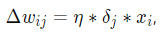

You've seen how to implement that for a single update, but how do we translate that code to calculate many weight updates so our network will learn?

As an example, I'm going to have you use gradient descent to train a network on graduate school admissions data found [here](http://www.ats.ucla.edu/stat/data/binary.csv). This dataset has three input features: GRE score, GPA, and the rank of the undergraduate school (numbered 1 through 4). Institutions with rank 1 have the highest prestige, those with rank 4 have the lowest.

#### Programming exercise:


Below, you'll implement gradient descent and train the network on the admissions data. Your goal here is to train the network until you reach a minimum in the mean square error (MSE) on the training set. You need to implement:

The network output: output.
The output error: error.
The error term: error_term.
Update the weight step: del_w +=.
Update the weights: weights +=.

In [ ]:
import numpy as np
from data_prep import features, targets, features_test, targets_test

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

def update_weights(weights, features, targets, learnrate):
  """
  Complete a single epoch of gradient descent and return updated weights
  """
  del_w = np.zeros(weights.shape)
  # Loop through all records, x is the input, y is the target
  for x, y in zip(features.values, targets):
      # Calculate the output of f(h) by passing h (the dot product
      # of x and weights) into the activation function (sigmoid).
    output = sigmoid(np.dot(x, weights))

      # Calculate the error by subtracting the network output
      # from the target (y).
    error = y - output

      # Calculate the error term by multiplying the error by the
      # gradient.
      # Recall that the gradient of the sigmoid f(h) is
      # f(h)*(1−f(h)) so you do not need to call any additional
      # functions and can simply apply this formula to the output and
      # error you already calculated.
    error_term = error  *output*  (1 - output)

      # Update the weight step by multiplying the error term by
      # the input (x) and adding this to the current weight step.
    del_w += error_term * x

      # Update the weights by adding the learning rate times the
      # change in weights divided by the number of records.
    n_records = features.shape[0]
    weights += learnrate * del_w / n_records
  
  return weights

def gradient_descent(features, targets, epochs=1000, learnrate=0.5):
    """
    Perform the complete gradient descent process on a given dataset
    """
    # Use to same seed to make debugging easier
    np.random.seed(42)
    
    # Initialize loss and weights
    last_loss = None
    n_features = features.shape[1]
    weights = np.random.normal(scale=1/n_features**.5, size=n_features)

    # Repeatedly update the weights based on the number of epochs
    for e in range(epochs):
        weights = update_weights(weights, features, targets, learnrate)

        # Printing out the MSE on the training set every 10 epochs.
        # Initially this will print the same loss every time.
        # The MSE should decrease with each printout
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            
    return weights

# Calculate accuracy on test data
weights = gradient_descent(features, targets)
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))